# Data Science London + Scikit-learn
This is a synthetic data set of 40 features, representing objects from two classes (labeled as 0 or 1). The training set has 1000 samples and the testing set has 9000.
More information can be found [here](https://www.kaggle.com/c/data-science-london-scikit-learn/data)

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random as rn

# Define plot style
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Read train and test data
train = pd.read_csv('../input/data-science-london-scikit-learn/train.csv', header=None)
test = pd.read_csv('../input/data-science-london-scikit-learn/test.csv', header=None)

# Read train labels
train_label = pd.read_csv('../input/data-science-london-scikit-learn/trainLabels.csv', header=None)

# Check the data dimensions
print('Train data:', train.shape)
print('Test data:', test.shape)
print('Train label', train_label.shape)

Train data: (1000, 40)
Test data: (9000, 40)
Train label (1000, 1)


In [3]:
# Print out data information
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

                0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.025596    -0.024526    -0.024088    -0.002271     1.092329   
std       1.008282     1.016298     0.979109     0.970575     4.538834   
min      -3.365711    -3.492086    -2.695602    -3.460471   -16.421901   
25%      -0.669010    -0.693937    -0.698830    -0.617557    -1.801997   
50%       0.027895    -0.033194     0.008145     0.002327     0.862818   
75%       0.762520     0.682753     0.661434     0.640743     3.843172   
max       3.326246     3.583870     2.546507     3.088738    17.565345   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     -0.006250     0.497342    -0.037883     0.026391    -0.003597  ...   
std       0.989128     2.118819     2.232256     1.001064     1.013520  ...   
min      -3.04125

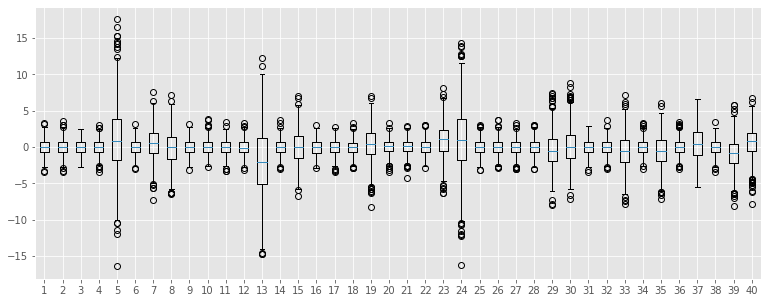

In [4]:
# Print out summary statistics
print(train.describe())

# Visualize summary statistics
fig, ax = plt.subplots(figsize=[13,5])  # default figsize = [6,4, 4.8]
plt.boxplot(train)
plt.show()

In [5]:
# Let's split train data into train and validadtion set
from sklearn.model_selection import train_test_split
train_label = np.ravel(train_label)
Xtrain, Xval, ytrain, yval = train_test_split(train, train_label, random_state=42, test_size=0.2)
print(Xtrain.shape)
print(Xval.shape)

(800, 40)
(200, 40)


# Import various classification models
In this notebook, we will try 5 different classifiers:
* k-neighest neighbors (KNN)
* Random forest (RF)
* Support vector machine (SVM) with linear and rbf kernels

We will first train the four classifiers on the raw data. Then, we will do some feature engineering using Gaussian Mixture Models (GMM) to obtain new data, and re-trained the four classifiers on the new data.

In [6]:
# Import classifiers from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Option 1: Raw data
## kNN

kNN (k=1): train accuracy=1.00000, validation accuracy=0.88500
kNN (k=2): train accuracy=0.95125, validation accuracy=0.88500
kNN (k=3): train accuracy=0.94625, validation accuracy=0.87500
kNN (k=4): train accuracy=0.95500, validation accuracy=0.89500
kNN (k=5): train accuracy=0.94375, validation accuracy=0.88000
kNN (k=6): train accuracy=0.94250, validation accuracy=0.90000
kNN (k=7): train accuracy=0.93375, validation accuracy=0.88500
kNN (k=8): train accuracy=0.93000, validation accuracy=0.89000
kNN (k=9): train accuracy=0.93625, validation accuracy=0.88000
kNN (k=10): train accuracy=0.92875, validation accuracy=0.90500
kNN (k=11): train accuracy=0.93125, validation accuracy=0.87500
kNN (k=12): train accuracy=0.92625, validation accuracy=0.88000
kNN (k=13): train accuracy=0.92250, validation accuracy=0.85000
kNN (k=14): train accuracy=0.92250, validation accuracy=0.88000
kNN (k=15): train accuracy=0.91750, validation accuracy=0.86000
kNN (k=16): train accuracy=0.91875, validation ac

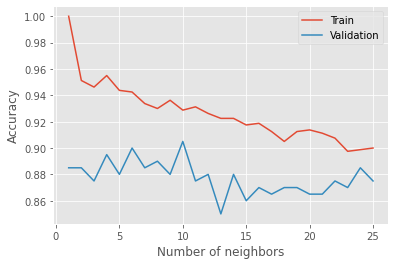

Best validation accuracy (k=10): 0.90500


In [7]:
num_neighs = np.arange(1,26)
train_accuracy = []
val_accuracy = []
best_accuracy_knn = 0.0

# Run kNN over different hyperparameter values
for i, n in enumerate(num_neighs):
    knn = KNeighborsClassifier(n_neighbors=n)
    # Fit kNN
    knn.fit(Xtrain, ytrain)
    # Train accuracy
    train_accuracy.append(knn.score(Xtrain, ytrain))
    # Validation accuracy
    val_accuracy.append(knn.score(Xval, yval))
    print("kNN (k={}): train accuracy={:.5f}, validation accuracy={:.5f}"
          .format(n, train_accuracy[i], val_accuracy[i]))
    if val_accuracy[i] > best_accuracy_knn:
        best_accuracy_knn = val_accuracy[i]
        best_knn = knn
        best_num_neighs = n

plt.plot(num_neighs, train_accuracy, label='Train')
plt.plot(num_neighs, val_accuracy, label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()

print('Best validation accuracy (k={}): {:.5f}'.format(best_num_neighs, best_accuracy_knn))

## RF

In [8]:
estimators = [25, 50, 75, 100]  # number of estimators 
max_depths = [20, 30, 40, 50]
splits = [5, 10, 15]
param = {'n_estimators':estimators, 
         'max_depth':max_depths, 
         'min_samples_split':splits}
train_accuracy = []
val_accuracy = []

rf = RandomForestClassifier(random_state=100)
RandomForestCV = GridSearchCV(estimator=rf, param_grid=param, cv=10)
RandomForestCV.fit(Xtrain, ytrain)
train_accuracy = RandomForestCV.score(Xtrain, ytrain)
best_accuracy_rf = RandomForestCV.score(Xval, yval)

# Print results
print(RandomForestCV.best_params_)
print("RF: train accuracy={:.5f}, validation accuracy={:.5f}"
      .format(train_accuracy, best_accuracy_rf))

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 75}
RF: train accuracy=1.00000, validation accuracy=0.85500


## SVM (linear)

In [9]:
svm = SVC(kernel='linear', random_state=100, C=1)
svm.fit(Xtrain, ytrain)
# Train accuracy
train_accuracy = svm.score(Xtrain, ytrain)
# Validation accuracy
best_accuracy_svml = svm.score(Xval, yval)
print("SVM (linear): train accuracy={:.5f}, validation accuracy={:.5f}"
      .format(train_accuracy, best_accuracy_svml))


SVM (linear): train accuracy=0.82625, validation accuracy=0.83500


## SVM (rbf)

In [10]:
svm = SVC(kernel='rbf', gamma='auto', random_state=100, C=1)
svm.fit(Xtrain, ytrain)
# Train accuracy
train_accuracy = svm.score(Xtrain, ytrain)
# Validation accuracy
best_accuracy_svmr = svm.score(Xval, yval)
print("SVM (rbf): train accuracy={:.5f}, validation accuracy={:.5f}"
      .format(train_accuracy, best_accuracy_svmr))

SVM (rbf): train accuracy=0.99750, validation accuracy=0.89500


Let's compare the final results when the classifiers were trained on the raw data

In [11]:
print('KNN: {:.5f}'.format(best_accuracy_knn))
print('RF: {:.5f}'.format(best_accuracy_rf))
print('SVM (linear): {:.5f}'.format(best_accuracy_svml))
print('SVM (rbf): {:.5f}'.format(best_accuracy_svmr))

KNN: 0.90500
RF: 0.85500
SVM (linear): 0.83500
SVM (rbf): 0.89500


# Option 2: Feature engineering
## Gaussian mixture model (GMM)
GMMs can have difficulty converging in a high dimensional space, so we will do dimensionality reduction on the data. Here, we will use a straightforward PCA, asking it to preserve 95% of the variance in the data

In [12]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(0.95,whiten=True)
train_pc = pca.fit_transform(train)
test_pc = pca.transform(test)
print(train_pc.shape)
print(test_pc.shape)

(1000, 29)
(9000, 29)


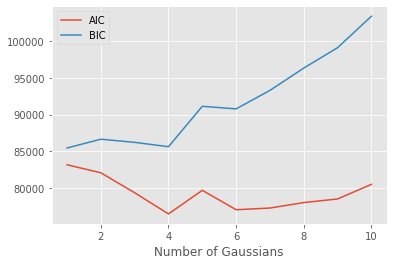

In [13]:
# Let's fit GMM with various number of components
n_components = np.arange(1,11)
models = [GaussianMixture(n, covariance_type='full', random_state=100) 
          for n in n_components]
aics = [model.fit(train_pc).aic(train_pc) for model in models]
bics = [model.fit(train_pc).bic(train_pc) for model in models]

plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('Number of Gaussians')
plt.legend()
plt.show()

It appears that around 4 components minimize both AIC and BIC. We can use the four cluster probabilities as new features.

In [14]:
best_gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train_pc)

# Let's apply the model to get probabilities
train_gmm = best_gmm.predict_proba(train_pc)
test_gmm = best_gmm.predict_proba(test_pc)
print(train_gmm.shape)
print(test_gmm.shape)

# Split the new data into train and validadtion set
Xtrain_gmm, Xval_gmm, ytrain_gmm, yval_gmm = train_test_split(train_gmm, train_label, random_state=42, test_size=0.2)

(1000, 4)
(9000, 4)


## kNN

kNN (k=2): train accuracy=0.99625, validation accuracy=0.98500
kNN (k=3): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=4): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=5): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=6): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=7): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=8): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=9): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=10): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=11): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=12): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=13): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=14): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=15): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=16): train accuracy=0.99625, validation accuracy=0.99000
kNN (k=17): train accuracy=0.99625, validation a

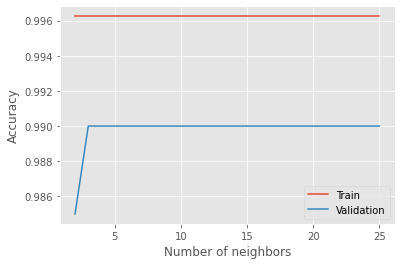

Best validation accuracy (k=3): 0.99000


In [15]:
num_neighs = np.arange(2,26)
train_accuracy = []
val_accuracy = []
best_accuracy_knn_gmm = 0.0

# Run kNN over different hyperparameter values
for i, n in enumerate(num_neighs):
    knn = KNeighborsClassifier(n_neighbors=n)
    # Fit kNN
    knn.fit(Xtrain_gmm, ytrain_gmm)
    # Train accuracy
    train_accuracy.append(knn.score(Xtrain_gmm, ytrain_gmm))
    # Validation accuracy
    val_accuracy.append(knn.score(Xval_gmm, yval_gmm))
    print("kNN (k={}): train accuracy={:.5f}, validation accuracy={:.5f}"
          .format(n, train_accuracy[i], val_accuracy[i]))
    if val_accuracy[i] > best_accuracy_knn_gmm:
        best_accuracy_knn_gmm = val_accuracy[i]
        best_knn = knn
        best_num_neighs = n

plt.plot(num_neighs, train_accuracy, label='Train')
plt.plot(num_neighs, val_accuracy, label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()

print('Best validation accuracy (k={}): {:.5f}'.format(best_num_neighs, best_accuracy_knn_gmm))

## RF

In [16]:
# Random Forest
estimators = [25, 50, 75, 100]  # number of estimators 
max_depths = [20, 30, 40, 50]
splits = [5, 10, 15]
param = {'n_estimators':estimators, 
         'max_depth':max_depths, 
         'min_samples_split':splits}

rf = RandomForestClassifier(random_state=100)
RandomForestCV = GridSearchCV(estimator=rf, param_grid=param, cv=10)  # cv=5 in default
RandomForestCV.fit(Xtrain_gmm, ytrain_gmm)
train_accuracy = RandomForestCV.score(Xtrain_gmm, ytrain_gmm)
best_accuracy_rf_gmm = RandomForestCV.score(Xval_gmm, yval_gmm)

# Print results
print(RandomForestCV.best_params_)
print("RF: train accuracy={:.5f}, validation accuracy={:.5f}"
      .format(train_accuracy, best_accuracy_rf_gmm))

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 25}
RF: train accuracy=0.99875, validation accuracy=0.98500


## SVM (linear)

In [17]:
# SVM (linear)
svm = SVC(kernel='linear', random_state=100, C=1)
svm.fit(Xtrain_gmm, ytrain_gmm)
# Train accuracy
train_accuracy = svm.score(Xtrain_gmm, ytrain_gmm)
# Validation accuracy
best_accuracy_svml_gmm = svm.score(Xval_gmm, yval_gmm)
print("SVM (linear): train accuracy={:.5f}, validation accuracy={:.5f}"
      .format(train_accuracy, best_accuracy_svml_gmm))

SVM (linear): train accuracy=0.99625, validation accuracy=0.99000


## SVM (rbf)

In [18]:
# SVM (rbf)
svm = SVC(kernel='rbf', gamma='auto', random_state=100, C=1)
svm.fit(Xtrain_gmm, ytrain_gmm)
# Train accuracy
train_accuracy = svm.score(Xtrain_gmm, ytrain_gmm)
# Validation accuracy
best_accuracy_svmr_gmm = svm.score(Xval_gmm, yval_gmm)
print("SVM (rbf): train accuracy={:.5f}, validation accuracy={:.5f}"
      .format(train_accuracy, best_accuracy_svmr_gmm))

SVM (rbf): train accuracy=0.99625, validation accuracy=0.99000


# Summary
Let's compare all the results we have gotten so far

In [19]:
acc_raw = [best_accuracy_knn, best_accuracy_rf, best_accuracy_svml, best_accuracy_svmr]
acc_gmm = [best_accuracy_knn_gmm, best_accuracy_rf_gmm, best_accuracy_svml_gmm, best_accuracy_svmr_gmm]

res = pd.DataFrame({'Raw': acc_raw, 'GMM': acc_gmm}, index=['kNN','RF','SVM (linear)','SVM (rbf)'])
print(res)

                Raw    GMM
kNN           0.905  0.990
RF            0.855  0.985
SVM (linear)  0.835  0.990
SVM (rbf)     0.895  0.990


# Submission
From the above, we can see that applying GMM increased the classification accuracy for all the four classifiers. We will re-train the four classifiers using entire samples and submit the results.

In [20]:
best_knn.fit(train_gmm, train_label)
ypred = best_knn.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/submission_knn.csv', index=False)

In [21]:
rf = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=25)
rf.fit(train_gmm, train_label)
ypred = rf.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/submission_rf.csv', index=False)

In [22]:
svm = SVC(kernel='linear', random_state=100, C=1)
svm.fit(train_gmm, train_label)
ypred = svm.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/submission_svm_linear.csv', index=False)

In [23]:
svm = SVC(kernel='rbf', random_state=100, C=1)
svm.fit(train_gmm, train_label)
ypred = svm.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/submission_svm_rbf.csv', index=False)